In [87]:
import numpy as np
import math
import cv2

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [50]:
num_of_samples_per_second = 10

In [67]:
def equation(vect,t, l_value, m_value, M_value, gamma1):
    #vect = [x, x_dot, theta, theta_dot]
    g = 9.81
    
    x = vect[0]
    x_dot = vect[1]
    theta = vect[2]
    theta_dot = vect[3]
    
    try:
        x_dot_dot = (u[math.floor(t)] + m_value*g*np.cos(theta)*np.sin(theta) - m_value*l_value*theta_dot**2*np.cos(theta))/(M_value + m_value - m_value*np.sin(theta)**2)
    except:
        print(f"blad w x_dot_dot, t={t}")
    theta_dot_dot = -(x_dot_dot*np.sin(theta) + g*np.cos(theta))/l_value

    x_dot_dot -= 1*x_dot
    theta_dot_dot -= gamma1*theta_dot
    return [x_dot, x_dot_dot, theta_dot, theta_dot_dot]

In [83]:
u = [0]*1 + [-160]*8 + [77]*4+[-20]*16

# g = 9.81 # Gravitational Acceleration
# l = 1.5  # Length of pendulum
# m = 3.0  #mass of bob (kg)
# M = 5.0  # mass of cart (kg)
# gamma1 = 0.5

# force = np.array(force)
t_eval=np.linspace( 0, 16, 160)

m=3.0
l=1.5
M=5.0
gamma1 = 0.5
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))

theta1 = sol[:,2]
theta_dot1 = sol[:,3]
theta_dot_dot1 = np.gradient(theta_dot1, t_eval)

l=3.0
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))

theta2 = sol[:,2]
theta_dot2 = sol[:,3]
theta_dot_dot2 = np.gradient(theta_dot2, t_eval)

l=1.5
m=6.0
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))

theta3 = sol[:,2]
theta_dot3 = sol[:,3]
theta_dot_dot3 = np.gradient(theta_dot3, t_eval)

m=3.0
M=10.0
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))

theta4 = sol[:,2]
theta_dot4 = sol[:,3]
theta_dot_dot4 = np.gradient(theta_dot4, t_eval)

M=5.0
gamma1 = 1.0
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))

theta5 = sol[:,2]
theta_dot5 = sol[:,3]
theta_dot_dot5 = np.gradient(theta_dot5, t_eval)

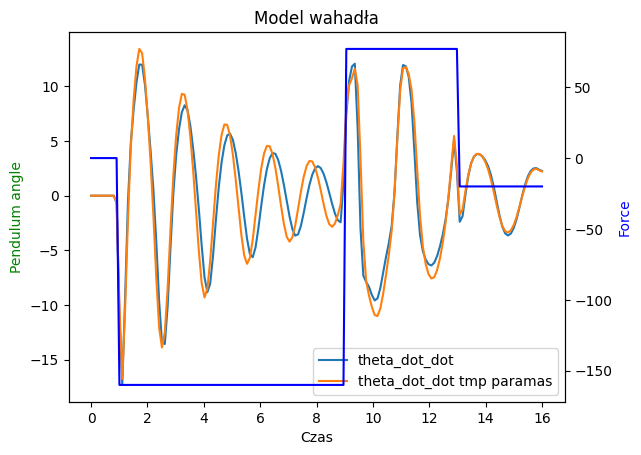

In [93]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
l, m, M, gamma1 = 1.3278331756591797, 1.984066128730774, 6.045757293701172, 0.5
sol = odeint(equation, [ 0.0, 0., -np.pi/2, 0. ], t_eval, args=(l, m, M, gamma1))
tmp_theta = sol[:,2]
tmp_theta_dot = sol[:,3]
tmp_theta_dot_dot = np.gradient(tmp_theta_dot, t_eval)

ax1.plot(t_eval, theta_dot_dot1, label='theta_dot_dot')
ax1.plot(t_eval, tmp_theta_dot_dot, label='theta_dot_dot tmp paramas')
# ax1.plot(t_eval, theta1, label='theta')
# ax1.plot(t_eval, theta2, label='theta m = 2*m')
# ax1.plot(t_eval, theta3, label='theta l = 2*l')
# ax1.plot(t_eval, theta4, label='theta M = 2*M')
ax1.set_xlabel('Czas')
ax1.set_ylabel('Pendulum angle', color='g')

new_u = [u[math.floor(i/num_of_samples_per_second)] for i in range(len(t_eval))]

ax2.plot(t_eval, new_u, 'b-')

ax2.set_ylabel('Force', color='b')

plt.title('Model wahadła')
ax1.legend(loc='best')
# plt.xlim(0,240)
plt.show()


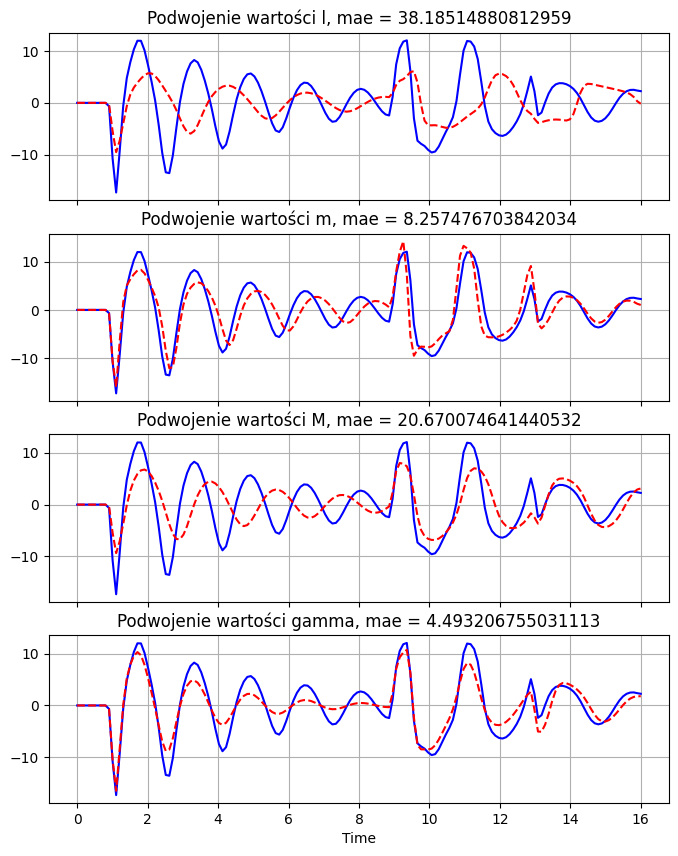

In [91]:
# Create four subplots vertically
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)


ax1.plot(t_eval, theta_dot_dot1, 'b')
ax1.plot(t_eval, theta_dot_dot2, 'r--')
ax1.set_title(f'Podwojenie wartości l, mae = {mean_squared_error(theta_dot_dot1, theta_dot_dot2)}')
ax1.grid()

ax2.plot(t_eval, theta_dot_dot1, 'b')
ax2.plot(t_eval, theta_dot_dot3, 'r--')
ax2.set_title(f'Podwojenie wartości m, mae = {mean_squared_error(theta_dot_dot1, theta_dot_dot3)}')
ax2.grid()

ax3.plot(t_eval, theta_dot_dot1, 'b')
ax3.plot(t_eval, theta_dot_dot4, 'r--')
ax3.set_title(f'Podwojenie wartości M, mae = {mean_squared_error(theta_dot_dot1, theta_dot_dot4)}')
ax3.grid()

ax4.plot(t_eval, theta_dot_dot1, 'b')
ax4.plot(t_eval, theta_dot_dot5, 'r--')
ax4.set_title(f'Podwojenie wartości gamma, mae = {mean_squared_error(theta_dot_dot1, theta_dot_dot5)}')
ax4.grid()
# Add a shared x-axis label
ax4.set_xlabel('Czas')

# Show the plots
plt.show()